In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
%matplotlib inline

### Reading dataset

In [3]:
df = pd.read_csv('D:/Programming/Data_Science/Codes/5_Machine_Learning/1_Regression/3_Regularization\Algerian_forest_fires_dataset_CLEANED.csv')

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Removing redundent features

In [6]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [8]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

### Dividing our dataset into dependent and independent features

In [9]:
X = df.drop('FWI', axis = 1) # Independent features
y = df['FWI'] # Dependent feature

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [10]:
X.shape

(243, 11)

In [11]:
y.shape

(243,)

### Splitting the dataset in train and test datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 47)

In [15]:
X_train.shape, y_train.shape

((170, 11), (170,))

In [16]:
X_test.shape, y_test.shape

((73, 11), (73,))

### Feature Selection based on correlation

In [18]:
corr = X_train.corr()

In [19]:
corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657582,-0.249581,-0.302448,0.694124,0.490840,0.361028,0.632735,0.457850,0.508393,0.285698
RH,-0.657582,1.000000,0.256408,0.203773,-0.622662,-0.330884,-0.141965,-0.655646,-0.272934,-0.366776,-0.377589
Ws,-0.249581,0.256408,1.000000,0.128924,-0.156519,0.017586,0.081958,0.033051,0.048346,-0.042992,-0.182410
Rain,-0.302448,0.203773,0.128924,1.000000,-0.542079,-0.298674,-0.307106,-0.356507,-0.310263,-0.397765,-0.045297
FFMC,0.694124,-0.622662,-0.156519,-0.542079,1.000000,0.601436,0.486059,0.753476,0.585683,0.794347,0.193474
DMC,0.490840,-0.330884,0.017586,-0.298674,0.601436,1.000000,0.867962,0.623686,0.980056,0.553732,0.122657
DC,0.361028,-0.141965,0.081958,-0.307106,0.486059,0.867962,1.000000,0.440146,0.936881,0.450529,-0.182883
ISI,0.632735,-0.655646,0.033051,-0.356507,0.753476,0.623686,0.440146,1.000000,0.586123,0.731147,0.194418
BUI,0.457850,-0.272934,0.048346,-0.310263,0.585683,0.980056,0.936881,0.586123,1.000000,0.548155,0.002330
Classes,0.508393,-0.366776,-0.042992,-0.397765,0.794347,0.553732,0.450529,0.731147,0.548155,1.000000,0.101744


<Axes: >

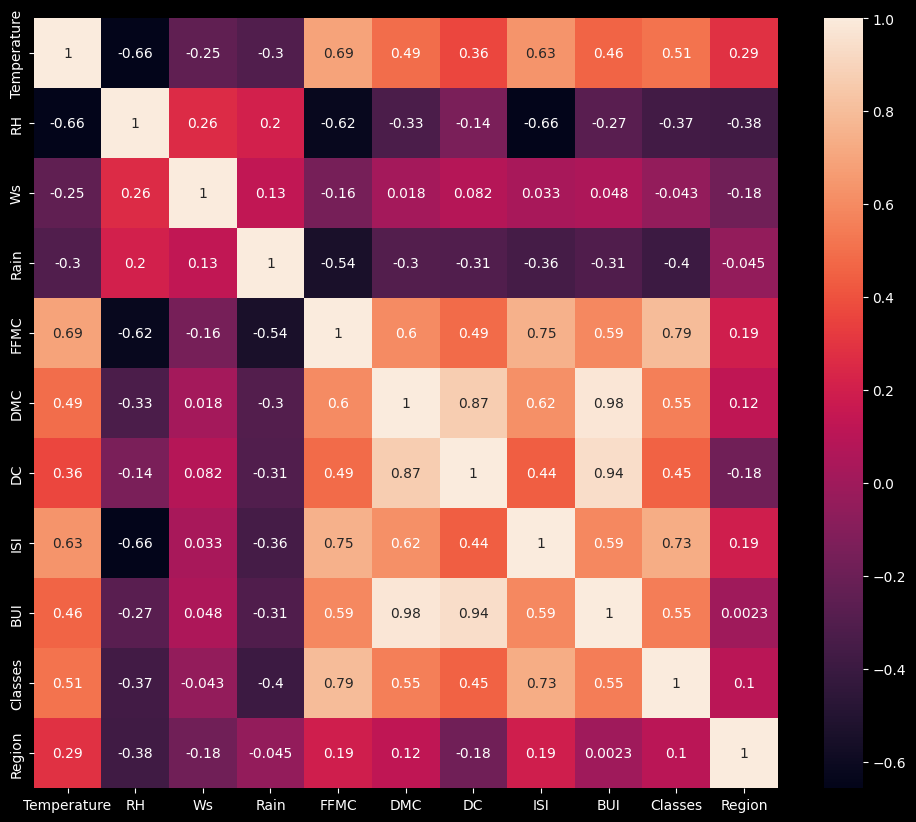

In [21]:
plt.figure(figsize = (12, 10))
sns.heatmap(corr, annot = True)

In [36]:
def correlation_feature_selection(dataset, threshold):
    selected_cols = set()
    corr_matrix = dataset.corr()
    for col_idx in range(len(corr_matrix.columns)):
        for row_idx in range(col_idx):
            if abs(corr_matrix.iloc[row_idx, col_idx] > threshold):
                col_name = corr_matrix.columns[col_idx]
                # print(col_name)
                selected_cols.add(col_name)
    return selected_cols

#### Threshold should be chosen by domain expert

In [39]:
corr_features = correlation_feature_selection(X_train, 0.85)

In [40]:
corr_features

{'BUI', 'DC'}

In [41]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)
X_train.shape, X_test.shape

((170, 9), (73, 9))

### Feature Scaling Or Standardization

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train after scaling')

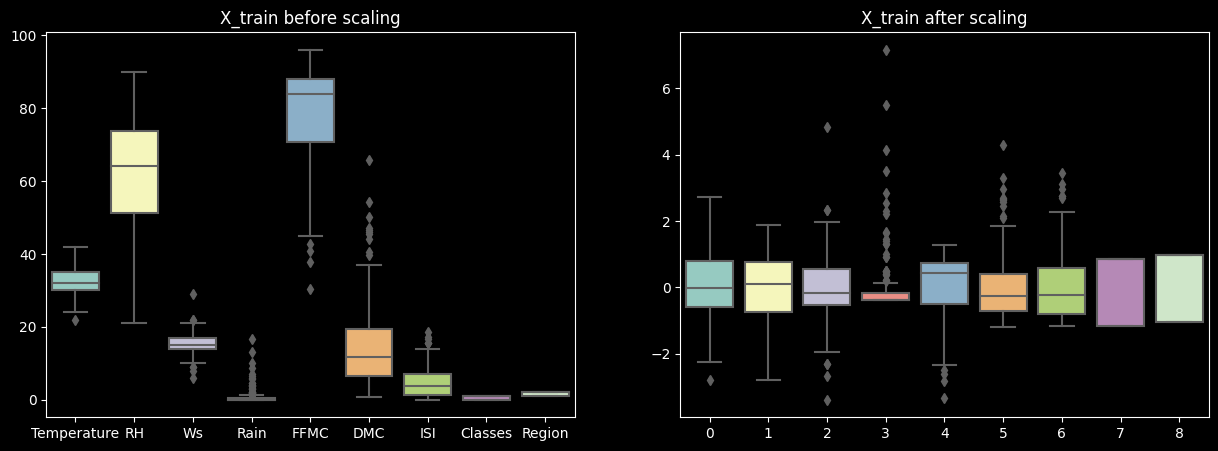

In [51]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")

### Linear Regression Model

In [53]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

y_pred = linear_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)
print("Accuracy score: ", r2score)

MSE:  3.4358275824789217
MAE:  0.7388537254217826
RMSE:  1.8535985494380711
Accuracy score:  0.9491443129978725


### Lasso Regression

In [54]:
lasso_regressor = Lasso()
lasso_regressor.fit(X_train_scaled, y_train)

y_pred = lasso_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)
print("Accuracy score: ", r2score)

MSE:  5.299498925026382
MAE:  1.529427309403556
RMSE:  2.302064057541923
Accuracy score:  0.9215590270089153


### Ridge Regression

In [55]:
ridge_regressor = Ridge()
ridge_regressor.fit(X_train_scaled, y_train)

y_pred = ridge_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)
print("Accuracy score: ", r2score)

MSE:  3.363722418778239
MAE:  0.7417245296800864
RMSE:  1.8340453698799926
Accuracy score:  0.9502115835603125


### ElasticNet Regression

In [56]:
elastic_net_regressor = ElasticNet()
elastic_net_regressor.fit(X_train_scaled, y_train)

y_pred = elastic_net_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)
print("Accuracy score: ", r2score)

MSE:  8.922098127628045
MAE:  2.1539410183051726
RMSE:  2.986988136506077
Accuracy score:  0.8679388243767605


### Saving the models

In [57]:
pickle.dump(scaler, open('standard_scaler.pkl', 'wb'))
pickle.dump(linear_regressor, open('linear_regressor.pkl', 'wb'))
pickle.dump(lasso_regressor, open('lasso_regressor.pkl', 'wb'))
pickle.dump(ridge_regressor, open('ridge_regressor.pkl', 'wb'))
pickle.dump(elastic_net_regressor, open('elastic_net_regressor.pkl', 'wb'))